<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/Thyroid/blob/main/Thyroid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.preprocessing import StandardScaler

## Data Collection and Preprocessing

In [82]:
thyroid_data=pd.read_csv('/content/Thyroid_Diff.csv')

In [83]:
thyroid_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [84]:
thyroid_data.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [85]:
thyroid_data.shape

(383, 17)

In [86]:
thyroid_data.describe()# only age is in number

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [87]:
thyroid_data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


# Lable Encoding

In [88]:
thyroid_data['Gender'].value_counts()

,count
Gender,
F,312
M,71


In [89]:
thyroid_data['Smoking'].value_counts()

,count
Smoking,
No,334
Yes,49


In [90]:
thyroid_data['Hx Smoking'].value_counts()

,count
Hx Smoking,
No,355
Yes,28


In [91]:
thyroid_data['Hx Radiothreapy'].value_counts()

,count
Hx Radiothreapy,
No,376
Yes,7


In [92]:
thyroid_data['Thyroid Function'].value_counts()

,count
Thyroid Function,
Euthyroid,332
Clinical Hyperthyroidism,20
Subclinical Hypothyroidism,14
Clinical Hypothyroidism,12
Subclinical Hyperthyroidism,5


In [93]:
thyroid_data['Physical Examination'].value_counts()

,count
Physical Examination,
Multinodular goiter,140
Single nodular goiter-right,140
Single nodular goiter-left,89
Normal,7
Diffuse goiter,7


In [94]:
thyroid_data['Adenopathy'].value_counts()

,count
Adenopathy,
No,277
Right,48
Bilateral,32
Left,17
Extensive,7
Posterior,2


In [95]:
thyroid_data['Pathology'].value_counts()

,count
Pathology,
Papillary,287
Micropapillary,48
Follicular,28
Hurthel cell,20


In [96]:
thyroid_data['Focality'].value_counts()

,count
Focality,
Uni-Focal,247
Multi-Focal,136


In [97]:
thyroid_data['Risk'].value_counts()

,count
Risk,
Low,249
Intermediate,102
High,32


In [98]:
thyroid_data['T'].value_counts()

,count
T,
T2,151
T3a,96
T1a,49
T1b,43
T4a,20
T3b,16
T4b,8


In [99]:
thyroid_data['N'].value_counts()

,count
N,
N0,268
N1b,93
N1a,22


In [100]:
thyroid_data['M'].value_counts()

,count
M,
M0,365
M1,18


In [101]:
thyroid_data['Stage'].value_counts()

,count
Stage,
I,333
II,32
IVB,11
III,4
IVA,3


In [102]:
thyroid_data['Response'].value_counts()

,count
Response,
Excellent,208
Structural Incomplete,91
Indeterminate,61
Biochemical Incomplete,23


In [103]:
thyroid_data['Recurred'].value_counts()

,count
Recurred,
No,275
Yes,108


In [104]:
label_encode = LabelEncoder()

In [105]:
label_1=label_encode.fit_transform(thyroid_data.Gender)

In [106]:
labels=np.array(['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage,Response','Recurred'])

In [107]:
#print(labels)

In [108]:
'''for i in labels:
  #print(i)
  label=label_encode.fit_transform(thyroid_data.i)'''

'for i in labels:\n  #print(i)\n  label=label_encode.fit_transform(thyroid_data.i)'

In [109]:
label_2=label_encode.fit_transform(thyroid_data.Smoking)

In [110]:
#label_3=label_encode.fit_transform(thyroid_data.Hx Smoking) - Due to spacing showing error

In [111]:
print(thyroid_data.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [112]:
label_3 = label_encode.fit_transform(thyroid_data["Hx Smoking"])#or Due to spacing or try strip function

In [113]:
label_4 = label_encode.fit_transform(thyroid_data["Hx Radiothreapy"])

In [114]:
label_5 = label_encode.fit_transform(thyroid_data["Thyroid Function"])

In [115]:
label_6 = label_encode.fit_transform(thyroid_data["Physical Examination"])

In [116]:
label_7 = label_encode.fit_transform(thyroid_data["Pathology"])

In [117]:
label_8 = label_encode.fit_transform(thyroid_data["Focality"])

In [118]:
label_9 = label_encode.fit_transform(thyroid_data["Risk"])

In [119]:
label_10 = label_encode.fit_transform(thyroid_data["T"])

In [120]:
label_11 = label_encode.fit_transform(thyroid_data["N"])

In [121]:
label_12 = label_encode.fit_transform(thyroid_data["M"])

In [122]:
label_13 = label_encode.fit_transform(thyroid_data["Stage"])

In [123]:
label_14 = label_encode.fit_transform(thyroid_data["Response"])

In [124]:
label_15 = label_encode.fit_transform(thyroid_data["Recurred"])

In [125]:
'''from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])  # Convert categorical to numerical'''# for mutiple line encoding using for loop syntax


"from sklearn.preprocessing import LabelEncoder\n\nlabel_encoder = LabelEncoder()\nfor col in X.select_dtypes(include=['object']).columns:\n    X[col] = label_encoder.fit_transform(X[col])  # Convert categorical to numerical"

In [126]:
thyroid_data['Gender_x']=label_1
thyroid_data['Smoking_x']=label_2
thyroid_data['Hx Smoking_x']=label_3
thyroid_data['Hx Radiothreapy_x']=label_4
thyroid_data['Thyroid Function_x']=label_5
thyroid_data['Physical Examination_x']=label_6
thyroid_data['Pathology_x']=label_7
thyroid_data['Focality_x']=label_8
thyroid_data['Risk_x']=label_9
thyroid_data['T_x']=label_10
thyroid_data['N_x']=label_11
thyroid_data['M_x']=label_12
thyroid_data['Stage_x']=label_13
thyroid_data['Response_x']=label_14
thyroid_data['target']=label_15# follows alphabetical order

In [127]:
thyroid_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,Physical Examination_x,Pathology_x,Focality_x,Risk_x,T_x,N_x,M_x,Stage_x,Response_x,target
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,...,3,2,1,2,0,0,0,0,2,0
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,...,1,2,1,2,0,0,0,0,1,0
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,...,4,2,1,2,0,0,0,0,1,0
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,...,4,2,1,2,0,0,0,0,1,0
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,...,1,2,0,2,0,0,0,0,1,0


In [128]:
thyroid_data['target'].value_counts()#otherwise sampling

,count
target,
0,275
1,108


In [129]:
thyroid_data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


# Split Train & Test

In [130]:
x=thyroid_data.drop(columns=['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred','target'],axis=1)
y=thyroid_data['target']

In [131]:
print(x)

     Age  Gender_x  Smoking_x  Hx Smoking_x  Hx Radiothreapy_x  \
0     27         0          0             0                  0   
1     34         0          0             1                  0   
2     30         0          0             0                  0   
3     62         0          0             0                  0   
4     62         0          0             0                  0   
..   ...       ...        ...           ...                ...   
378   72         1          1             1                  1   
379   81         1          1             0                  1   
380   72         1          1             1                  0   
381   61         1          1             1                  1   
382   67         1          1             0                  0   

     Thyroid Function_x  Physical Examination_x  Pathology_x  Focality_x  \
0                     2                       3            2           1   
1                     2                       1        

In [132]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: target, Length: 383, dtype: int64


In [133]:
corr_matrix =thyroid_data[['Age','Gender_x','Smoking_x','Hx Smoking_x','Hx Radiothreapy_x','Thyroid Function_x','Physical Examination_x','Pathology_x','Focality_x','Risk_x','T_x','N_x','M_x','Stage_x','Response_x','target']].corr()

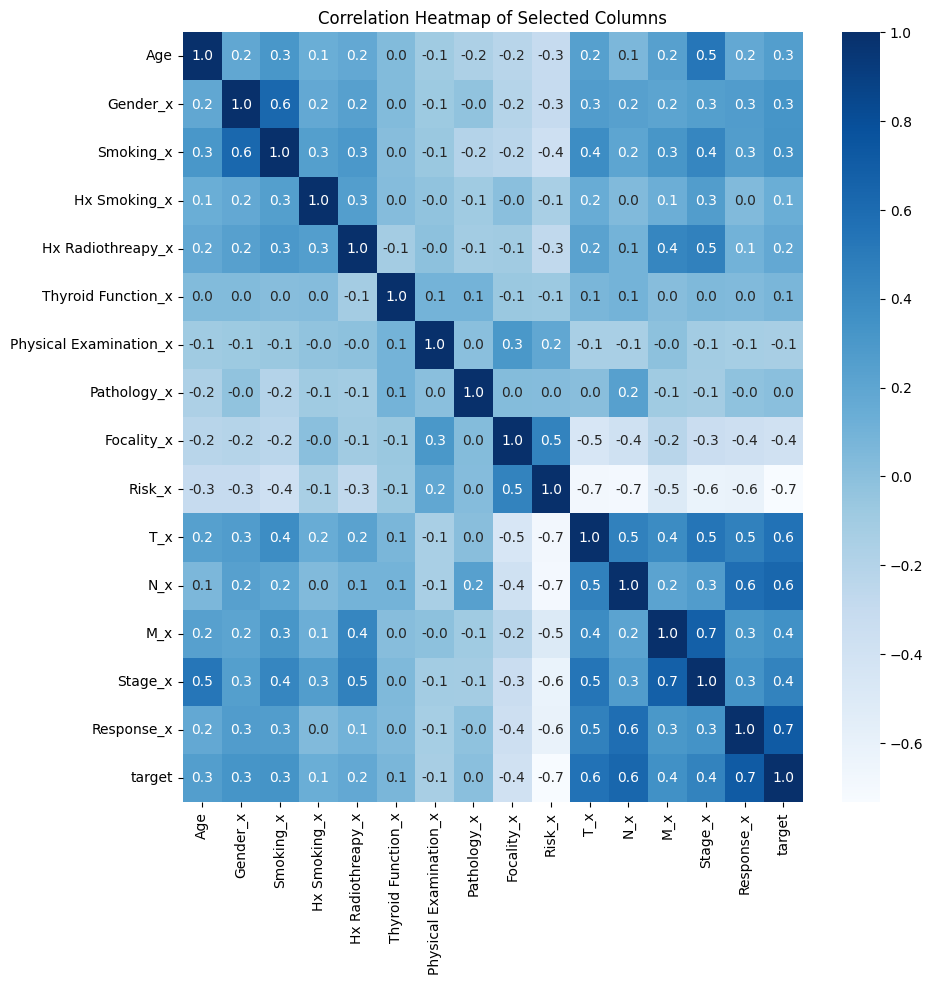

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".1f")

plt.title("Correlation Heatmap of Selected Columns")
plt.show()

In [135]:
scalar=StandardScaler()

In [136]:
scalar.fit(x)

StandardScaler()

In [137]:
std_data=scalar.transform(x)

In [138]:
print(std_data)

[[-0.91743929 -0.47703679 -0.38302296 ... -0.22206996 -0.31442613
   0.46441951]
 [-0.45431469 -0.47703679 -0.38302296 ... -0.22206996 -0.31442613
  -0.62682387]
 [-0.71895732 -0.47703679 -0.38302296 ... -0.22206996 -0.31442613
  -0.62682387]
 ...
 [ 2.05979025  2.09627436  2.61080955 ...  4.50308536  4.86515272
   1.55566289]
 [ 1.33202303  2.09627436  2.61080955 ... -0.22206996  3.57025801
   1.55566289]
 [ 1.72898697  2.09627436  2.61080955 ... -0.22206996  3.57025801
   1.55566289]]


In [139]:
x=std_data
y=thyroid_data['target']

In [140]:
print(x)
print(y)

[[-0.91743929 -0.47703679 -0.38302296 ... -0.22206996 -0.31442613
   0.46441951]
 [-0.45431469 -0.47703679 -0.38302296 ... -0.22206996 -0.31442613
  -0.62682387]
 [-0.71895732 -0.47703679 -0.38302296 ... -0.22206996 -0.31442613
  -0.62682387]
 ...
 [ 2.05979025  2.09627436  2.61080955 ...  4.50308536  4.86515272
   1.55566289]
 [ 1.33202303  2.09627436  2.61080955 ... -0.22206996  3.57025801
   1.55566289]
 [ 1.72898697  2.09627436  2.61080955 ... -0.22206996  3.57025801
   1.55566289]]
0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: target, Length: 383, dtype: int64


In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [142]:
print(x.shape, x_train.shape, x_test.shape)

(383, 15) (306, 15) (77, 15)


# Model Training

In [143]:
model=LogisticRegression()

In [144]:
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

In [145]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [146]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9084967320261438


In [147]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [148]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.935064935064935


# Making Predictive system

In [149]:
'''user_input=[]
for i in range(15):
  user_input.append(input())

user_input_array=np.asarray(user_input)
user_input_array_reshaped=user_input_array.reshape(1,-1)
std_data=scalar.transform(user_input_array_reshaped)
prediction=model.predict(std_data)
print(prediction)
if prediction[0]==0:
  print('No Disease')
else:
  print('Disease')'''


"user_input=[]\nfor i in range(15):\n  user_input.append(input())\n\nuser_input_array=np.asarray(user_input)\nuser_input_array_reshaped=user_input_array.reshape(1,-1)\nstd_data=scalar.transform(user_input_array_reshaped)\nprediction=model.predict(std_data)\nprint(prediction)\nif prediction[0]==0:\n  print('No Disease')\nelse:\n  print('Disease')"